# Creating Plots

*xarray* has a built-in plotting functionality that allows you to visualize the data. However, this plotting functionality is built on top of another popular Python library called *matplotlib*. So, before you can use Xarray's plotting functions, you need to make sure that Matplotlib is installed in your Python environment, as Xarray depends on it for creating the visualizations. 

## Opening a file

In [1]:
import xarray as xr
netcdf_file = 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset>
Dimensions:              (DEPTH: 11)
Coordinates:
  * DEPTH                (DEPTH) float32 323.0 200.3 120.1 ... 20.12 10.09 5.163
Data variables:
    CHLOROPHYLL_A_TOTAL  (DEPTH) float64 ...
    PHAEOPIGMENTS_TOTAL  (DEPTH) float64 ...
    FILTERED_VOL_TOTAL   (DEPTH) float64 ...
    EVENTID_TOTAL        (DEPTH) |S64 ...
    CHLOROPHYLL_A_10um   (DEPTH) float64 ...
    PHAEOPIGMENTS_10um   (DEPTH) float64 ...
    FILTERED_VOL_10um    (DEPTH) float64 ...
    EVENTID_10um         (DEPTH) |S64 ...
Attributes: (12/37)
    id:                                 71433e5e-e81a-5b24-a529-6be0f5f18069
    naming_authority:                   The University Centre in Svalbard, No...
    title:                              Chlorophyll A and phaeopigments Nanse...
    summary:                            'This dataset is a collection of the ...
    keywords:                           Oceans > Ocean chemistry > Chlorophyll
    keywords_vocabulary:                GCMD Science Keywords
    ...                                 ...
    samplingProtocol:                   Nansen Legacy sampling protocols vers...
    pi_name:                            Anna Vader
    pi_institution:                     University Centre in Svalbard
    pi_email:                           annav@unis.no
    sea_floor_depth_below_sea_surface:  332.58
    _NCProperties:                      version=2,netcdf=4.6.3,hdf5=1.10.5

Okay, now let's see if we can plot some of the variables above.

## Variables with one dimension

Variables with one dimension can be plotted as scatter or line plots. Let's have a look at some examples

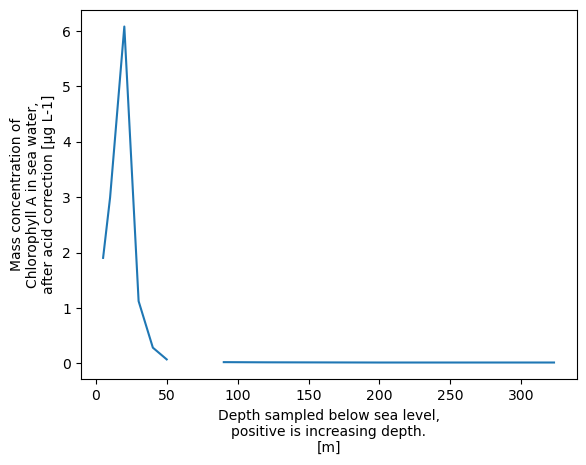

In [2]:
xrds['CHLOROPHYLL_A_TOTAL'].plot()

That doesn't look nice! if we look at the values we can see what is happening.

In [3]:
xrds['CHLOROPHYLL_A_TOTAL'].values

array([0.01565072, 0.01550788, 0.01912119, 0.02236113,        nan,
       0.07194841, 0.28370929, 1.12279562, 6.07793473, 2.99329871,
       1.90354194])

Then let's drop the nan values before we plot the data.

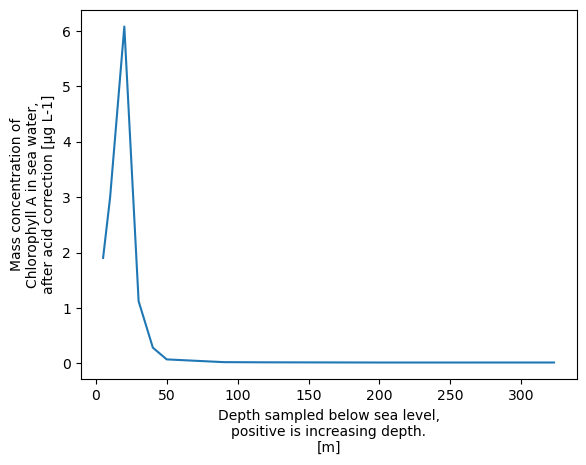

In [4]:
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'))

It makes more sense to have depth on the y axis, so let's do that

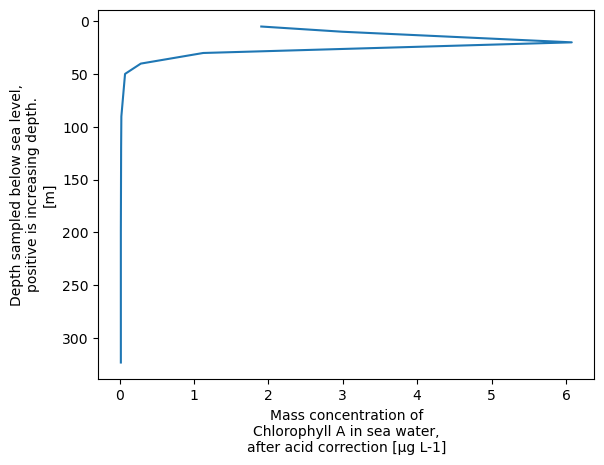

In [5]:
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'),y='DEPTH', yincrease=False)

Altneratively, we can easily create a scatter plot

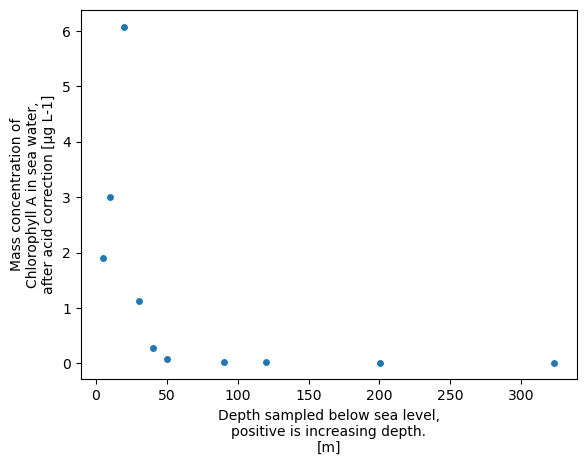

In [6]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.scatter()

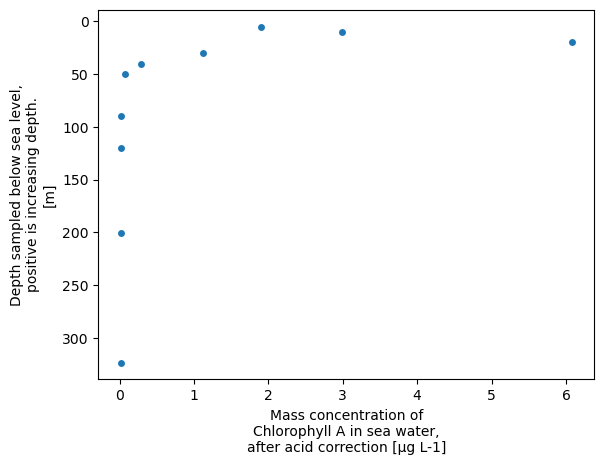

In [7]:
xrds.plot.scatter(x='CHLOROPHYLL_A_TOTAL', y='DEPTH', yincrease=False)

Let's try some alternative plots

(array([6., 1., 0., 1., 1., 0., 0., 0., 0., 1.]),
 array([0.01550788, 0.62175057, 1.22799325, 1.83423594, 2.44047862,
        3.04672131, 3.65296399, 4.25920668, 4.86544936, 5.47169204,
        6.07793473]),
 <BarContainer object of 10 artists>)

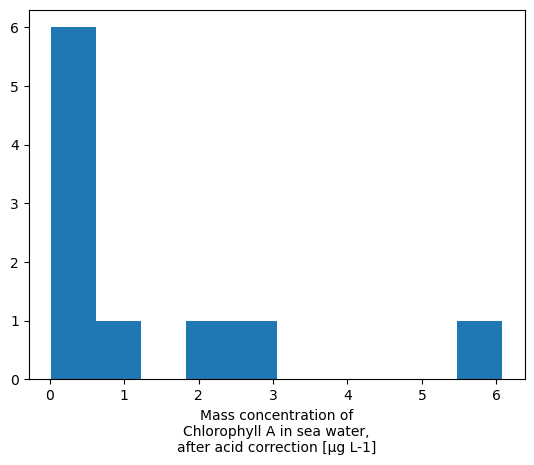

In [8]:
# Histogram
xrds['CHLOROPHYLL_A_TOTAL'].plot.hist()

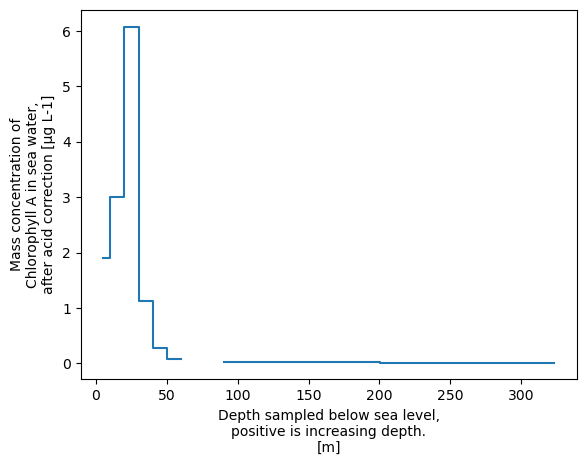

In [9]:
# Step plot
xrds['CHLOROPHYLL_A_TOTAL'].plot.step()

We can also plot multiple variables together

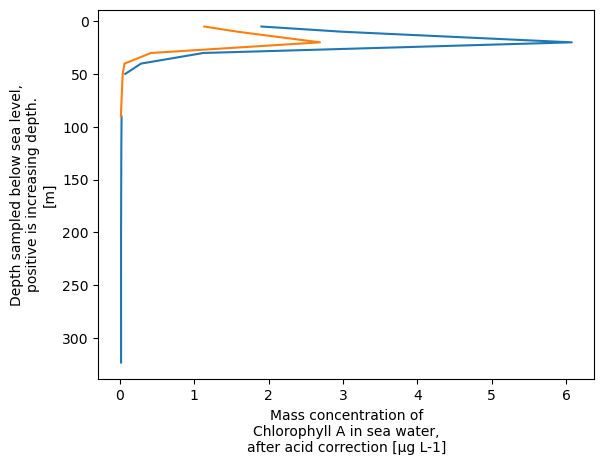

In [10]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL')
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um')

But if we actually want to see the labels, we need to use the matplotlib library

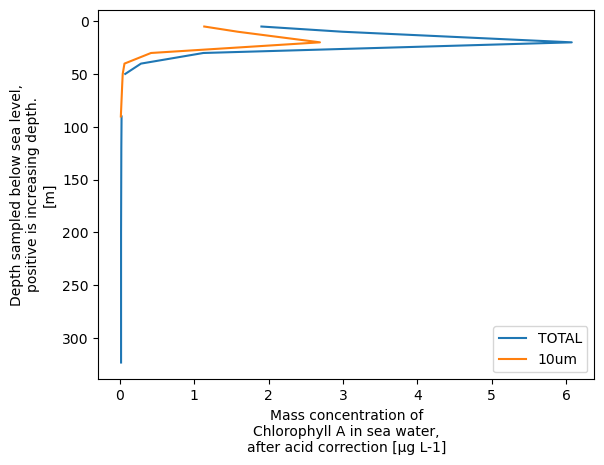

In [11]:
import matplotlib.pyplot as plt
xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL')
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um')
plt.legend()
plt.show()

We can now do all kinds of things to customise this plot using the full matplotlib library. For example:

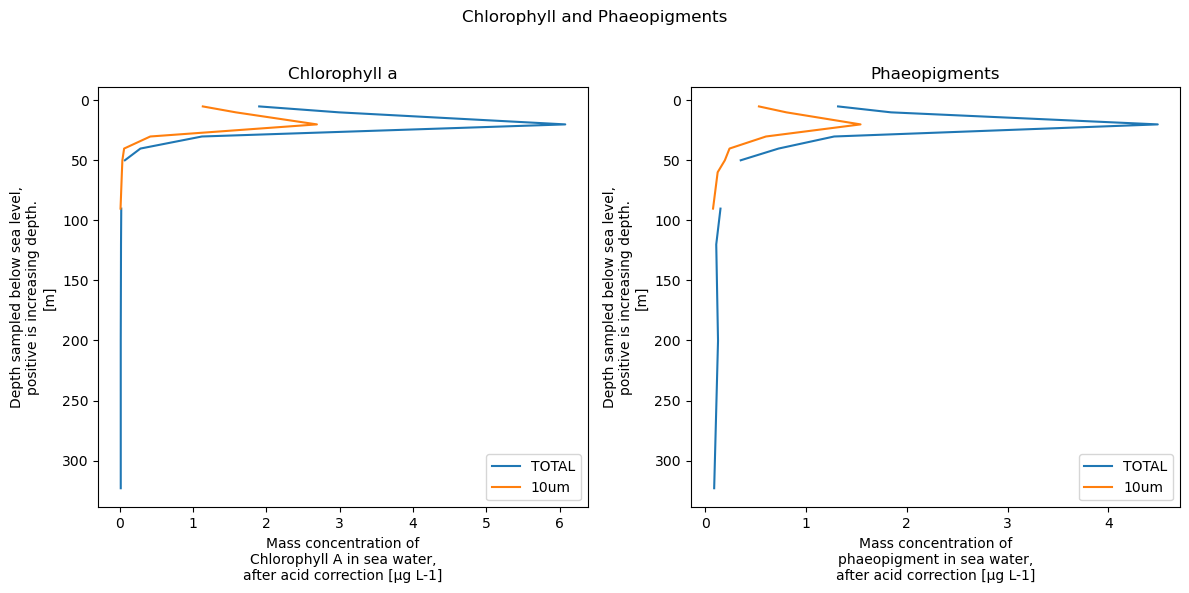

In [12]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL', ax=axes[0])
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um', ax=axes[0])
axes[0].set_title('Chlorophyll a')
axes[0].legend()

xrds['PHAEOPIGMENTS_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL', ax=axes[1])
xrds['PHAEOPIGMENTS_10um'].plot.line(y='DEPTH', yincrease=False, label='10um', ax=axes[1])
axes[1].set_title('Phaeopigments')
axes[1].legend()

# Adjust layout and display the plot
plt.suptitle('Chlorophyll and Phaeopigments')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to avoid overlap
plt.show()

## 2D plots - e.g. maps

We will load in some satellite data now. This is a single time slice of data for a single Sentinel-1 satellite product. 

In [13]:
netcdf_file = 'https://thredds.met.no/thredds/dodsC/arcticdata/sios/SvalSCE/2019/06/daily-avhrr-sce-Svalbard_201906301200_c.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset>
Dimensions:                  (time: 1, bounds: 2, xc: 200, yc: 200)
Coordinates:
  * time                     (time) datetime64[ns] 2019-06-30T12:00:00
  * xc                       (xc) float64 0.0 4.02e+03 ... 7.96e+05 8e+05
  * yc                       (yc) float64 0.0 4.02e+03 ... 7.96e+05 8e+05
    lon                      (yc, xc) float32 ...
    lat                      (yc, xc) float32 ...
Dimensions without coordinates: bounds
Data variables:
    time_bounds              (time, bounds) datetime64[ns] ...
    land_area_fraction       (yc, xc) float64 ...
    prob_snow                (time, yc, xc) float32 ...
    prob_nosnow              (time, yc, xc) float32 ...
    classed_product          (time, yc, xc) int8 ...
    num_obs_used             (time, yc, xc) float32 ...
    num_pass                 (time, yc, xc) float32 ...
    gapfree_classed_product  (time, yc, xc) float32 ...
Attributes: (12/25)
    title:                   Daily aggregated snow cover product for Svalbard
    product_name:            Fmsnowcover Svalbard snow cover product
    product_status:          offline
    topiccategory:           ClimatologyMeteorologyAtmosphere
    activity_type:           Space borne instrument
    area:                    Svalbard
    ...                      ...
    geospatial_lat_max:      81.09786
    geospatial_lon_min:      -2.115085
    geospatial_lon_max:      42.11509
    NCO:                     netCDF Operators version 4.8.0 (Homepage = http:...
    keywords:                Cryosphere > Snow/Ice > Snow Cover\n Terrestrial...
    keywords_vocabulary:     GCMD

Let's quickly look at one variable.

In [14]:
xrds['prob_snow']

<xarray.DataArray 'prob_snow' (time: 1, yc: 200, xc: 200)>
[40000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2019-06-30T12:00:00
  * xc       (xc) float64 0.0 4.02e+03 8.04e+03 ... 7.92e+05 7.96e+05 8e+05
  * yc       (yc) float64 0.0 4.02e+03 8.04e+03 ... 7.92e+05 7.96e+05 8e+05
    lon      (yc, xc) float32 ...
    lat      (yc, xc) float32 ...
Attributes:
    units:      %
    long_name:  Aggregated snow probability
    valid_min:  0
    valid_max:  10000

The variable has 3 dimensions, *time*, *yc* and *xc*. However, there is only 1 time slice, so we can consider this 2D data that we can plot.

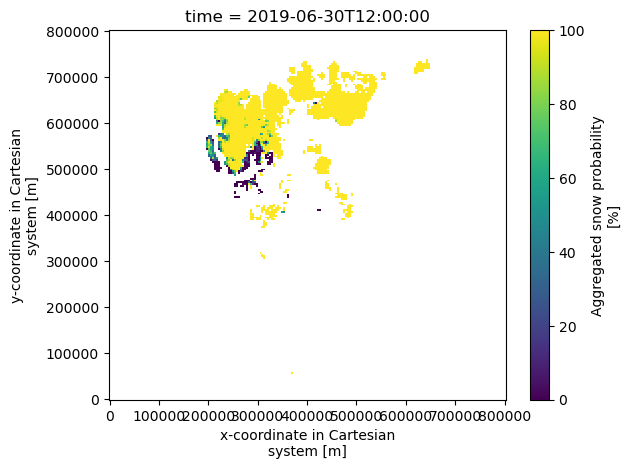

In [15]:
xrds['prob_snow'].plot()

Now let's zoom in and plot something

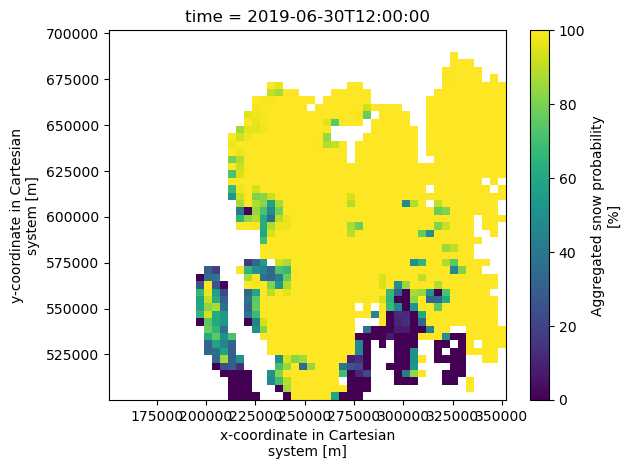

In [16]:
# Define the ranges for xc and yc
xc_range = slice(150000, 350000)  # Adjust the range as needed
yc_range = slice(500000, 700000)  # Adjust the range as needed

# Select the subset of the data and extract numeric values
subset = xrds['prob_snow'].sel(xc=xc_range, yc=yc_range)

# Plot the subset
subset.plot()

This is designed only to be a short demonstration of how easy it can be to plot data out of a CF-NetCDF file. Matplotlib is very powerful and flexible, and you can use it to create all sorts of plots! There are many good tutorials on how to use matplotlib online, so go and explore!